# Neural Nets Tutorial - Part 1 (Draft)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Prerequisites - vectors, matrices, linear algebra

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zutils as utils
import pprint as pp

In [40]:
vector = np.array([1,2])
matrix = np.array([[1,1], [1,0]])
pp.pprint(vector)
utils.hr()
pp.pprint(matrix)

array([1, 2])
----------------------------------------
array([[1, 1],
       [1, 0]])


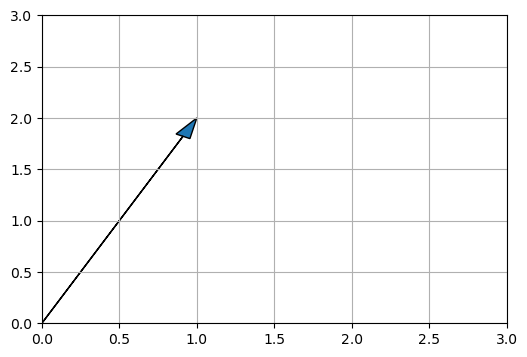

In [44]:
# Plot the vector
plt.figure(figsize=(6,4))
plt.xlim(0,3)
plt.ylim(0,3)
plt.grid()
plt.arrow(x=0, y=0, dx=vector[0], dy=vector[1], head_width=.1, head_length=.2, length_includes_head=True)
plt.show()

L2 norm of a vector (length): <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">Wiki on p-norm</a>
$$ ||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} + \cdots + x_{n}^{2}} $$

In [55]:
norm_vector = np.sqrt(np.sum(vector**2))
print('Length of vector:', norm_vector)

Length of vector: 2.23606797749979


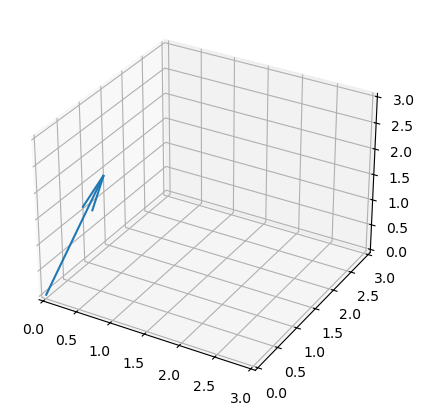

In [75]:
def vector_norm(v):
    return np.sqrt(np.sum(v**2))

v = np.array([0,1,1])
norm = vector_norm(v)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.quiver(0,0,0, v[0], v[1], v[2], length=norm)
plt.show()

In [77]:
# SCALE A VECTOR
scale = 0.5
v = np.array([1,1,0,1]) * scale
pp.pprint(v)

array([0.5, 0.5, 0. , 0.5])


In [79]:
# ADD TWO VECTORS - element-wise addition
v1 = np.array([1,1,1]) + np.array([2,1,3])
pp.pprint(v1)

array([3, 2, 4])


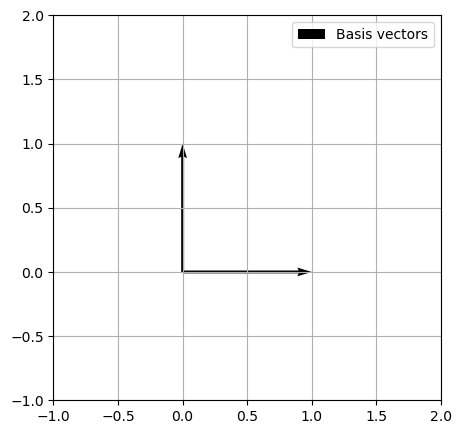

In [113]:
# BASIS VECTORS IN 2D

ux = np.array([1,0])
uy = np.array([0,1])

plt.figure(figsize=(5,5))
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.grid()
plt.quiver([0,0], [0,0], [ux[0], uy[0]], [ux[1], uy[1]], 
           angles='xy', scale_units='xy', scale=1, label='Basis vectors')
plt.legend()
plt.show()

Point: [2.1 2.5]


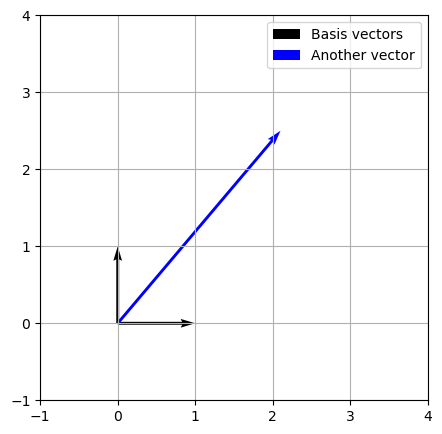

In [117]:
# Any point in space can be reached with the basis vectors
# Example:
point = (2.1, 2.5)

v1 = ux * point[0] + uy * point[1]
print('Point:', v1)

plt.figure(figsize=(5,5))
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.grid()
plt.quiver([0,0], [0,0], [ux[0], uy[0]], [ux[1], uy[1]], 
           angles='xy', scale_units='xy', scale=1, label='Basis vectors')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, label='Another vector', color='b')
plt.legend()
plt.show()

In [119]:
# The basis vectors are orthogonal
dot_product = np.dot(ux, uy)
print('Dot product of basis vectors:', dot_product)

Dot product of basis vectors: 0


In [140]:
# Create a matrix as a numpy array
M = np.array([[0,1,2], [1,0,2], [3,1,0]])
print(M)

[[0 1 2]
 [1 0 2]
 [3 1 0]]


In [142]:
(rows, cols) = M.shape
print(f'rows = {rows}, cols = {cols}', 'Shape:', M.shape)

rows = 3, cols = 3 Shape: (3, 3)


In [150]:
# access an element
print(M[0,2])
# access a row
print(M[1])
# access a column
print(M[:,0])
# get a slice
print(M[:2, :2]) # upper limit not included: get 2-1 rows, 2-1 cols

2
[1 0 2]
[0 1 3]
[[0 1]
 [1 0]]


## Linear Regression

Now that we understand a bit about vectors and matrices, let's look at a concrete example.  We'll use linear regression to predict tomorrow's temperature.  We do this with the equation $\hat{y}=wx + b$ where $\hat{y}$ is the prediction, $w$ is the weight, $x$ is the input, and $b$ is the bias.

We can first read in our data using pandas:

In [162]:
# Read in the data
data = pd.read_csv("data/clean_weather.csv", index_col=0)
# Fill in any missing values in the data with past values
data = data.ffill()

# Show the first 5 rows of the data
data.head()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In the table above, tomorrow's temperature is `tmax_tomorrow`, today's max temperature is `tmax`, today's min temperature is `tmin`, and how much it rained today is `rain`.  We're going to use `tmax`, `tmin`, and `rain` to predict `tmax_tomorrow`.

Because we have more than one predictor, we can extend our equation to multiple predictors like this:

$$ \large \hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b $$

So to get a prediction for tomorrow's temperature $\hat{y}$, we can take a value called $w_{1}$, and multiply it by `tmax`, then take $w_{2}$ and multiply it by `tmin`, then take $w_{3}$ and multiply it by `rain`.  We'd then add in $b$.  Here's how that could look:

In [178]:
# example coefficients
w1 = .7
w2 = .3
w3 = .1
b = 10

t_hat = w1 * 52 + w2 * 39 + w3 * 0 + b
print('Prediction of tomorrow temperature:', np.round(t_hat, decimals=1))

Prediction of tomorrow temperature: 58.1


In [202]:
# Matrix multiplication
w = np.array([.7, .3, .1])
x = data.loc["1970-01-02"].to_numpy()[:-1]
b = 10
print(x)
utils.hr()
pred = np.dot(w, x) + b
print('Prediction temperature =', np.round(pred, 1))

[52. 39.  0.]
----------------------------------------
Prediction temperature = 58.1


### Matrix Multiplication

What if we want to make predictions for multiple rows at once?  It would be annoying to have to do the dot product for each row.  Luckily, we can use linear algebra to help us out.  We first need to convert our x data and our weights to a matrix.  We can then do a matrix multiplication to get our predictions.

Matrix multiplication is a linear algebra operation defined like this:

$$ \large
\begin{equation}
    A \times B =
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_{11}b_{11} + a_{12}b_{21} \\
      a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

We can visualize how it works with this gif:

![Matrix mult](images/linalg/matrix_mult.gif)

As you can see, we essentially take each row of matrix A and multiply it by each column of matrix B, then add everything together.  The number of columns in the first matrix has to equal the number of rows in the second matrix.

This is very useful to us when we're multiplying weights by input numbers.  We can take our $x$ values, put them into a matrix, then multiply by the weights (also in a matrix):

In [256]:
# read first 3 rows from the weather dataframe
X = data[['tmax', 'tmin', 'rain']].iloc[:3].to_numpy()
print(X)
utils.hr()
print(X.shape, w.shape)
# convert weigths vector to matrix
W = w.reshape(3,1)
print(W)

# compute matrix multiplication
B = np.array([b])

pred = X @ W + B
print('Predictions (3 days):')
print(pred)

[[60. 35.  0.]
 [52. 39.  0.]
 [52. 35.  0.]]
----------------------------------------
(3, 3) (3,)
[[0.7]
 [0.3]
 [0.1]]
Predictions (3 days):
[[62.5]
 [58.1]
 [56.9]]


## The normal equation for computing weights

Earlier, we used values for $w$ and $b$ that were given to us.  We can also directly calculate the correct values for $w$ and $b$ using the *normal equation*.

The normal equation is a mathematical equation that gives us the exact solution for $w$ and $b$ that minimizes the error of our model.  It's defined like this:

$$ \large W = (X^T X)^{-1} X^T Y $$

You can think of this equation as finding the coefficients $W$ that project the coordinates $Y$ onto the basis $X$. Another way to say this is that we're multiplying the predictors $X$ by the weights $W$ and trying to get as close as possible to $Y$.

Yet another way to say this (it's a complicated concept!) is that we're changing the basis vectors of $Y$ to the vectors in $X$.  The coefficients $W$ find a way to do this while minimizing error.

We won't go into more detail on this here, but I recommend reading [this book](https://mml-book.github.io/) for more detail.


In [244]:
np.allclose((W.T @ X.T).T, X @ W)

True

In [270]:
# MATRIX INVERSION
#np.linalg.inv(X) # Singular matrix! cannot invert

#### technique to remedy singularity of X
#### (singular means a row is a linear combination of another row

ridge = X + .10 * np.eye(X.shape[0])
print(ridge)

[[60.1 35.   0. ]
 [52.  39.1  0. ]
 [52.  35.   0.1]]


In [264]:
inverse = np.linalg.inv(ridge)
ridge @ inverse

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.44089210e-16,  1.00000000e+00,  0.00000000e+00],
       [ 6.88208797e-16, -1.18516114e-16,  1.00000000e+00]])

In [268]:
np.allclose(ridge @ inverse, np.eye(3)) 

True

In [306]:
### APPLY NORMAL EQUATION TO COMPUTE THE WEIGHTS MATRIX

# get the actual t_tomorrow values
Y = data[['tmax_tomorrow']].iloc[:3].to_numpy()
print(Y)
x = data.loc["1970-01-02"].to_numpy()[:-1]
print(x)
print('X.T @ X =\n', X.T @ X) # singular matrix!
# correcting for singularity
Wp  = np.linalg.inv((X.T @ X) + .1 * np.eye(x.shape[0])) @ X.T @ Y
print('Weights computed:\n', Wp)
prediction = X @ Wp
print(prediction)

[[52.]
 [52.]
 [53.]]
[52. 39.  0.]
X.T @ X =
 [[9008. 5948.    0.]
 [5948. 3971.    0.]
 [   0.    0.    0.]]
Weights computed:
 [[0.38283829]
 [0.86270249]
 [0.        ]]
[[53.16488447]
 [53.55298814]
 [50.10217817]]


## Broadcasting

A couple of sections back, we used broadcasting to add the bias `b` to the result of `X @ W`.  Broadcasting enables arrays with compatible shapes to be added or multiplied.

If shapes are compatible, it means that:
* The smaller array has all of its dimensions exactly matching the length dimensions of the larger array
* Or the smaller array is length 1 in the non-matching dimensions.

Here are some examples:

In [334]:
B =np.array([10])
A = np.ones((5,1))
print(A)
O = np.ones((1,1))
utils.hr()
print(O)
utils.hr()
print(A + B)
utils.hr()
print((A + O).T)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
----------------------------------------
[[1.]]
----------------------------------------
[[11.]
 [11.]
 [11.]
 [11.]
 [11.]]
----------------------------------------
[[2. 2. 2. 2. 2.]]


In [346]:
A = np.ones((1, 1))
shape, value = (4,3), 2
A = np.full(shape, value, dtype=float)
print(A)

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [358]:
B = np.random.rand(shape[0], shape[1])
print(B)
utils.hr()
print(A * B) # this does en element-by-element product

[[0.08640127 0.02101624 0.37166728]
 [0.01025391 0.58560282 0.86230274]
 [0.65950009 0.49727109 0.35572743]
 [0.65223778 0.43207114 0.02608876]]
----------------------------------------
[[0.17280254 0.04203248 0.74333457]
 [0.02050782 1.17120565 1.72460547]
 [1.31900017 0.99454218 0.71145487]
 [1.30447556 0.86414229 0.05217752]]


## Derivatives

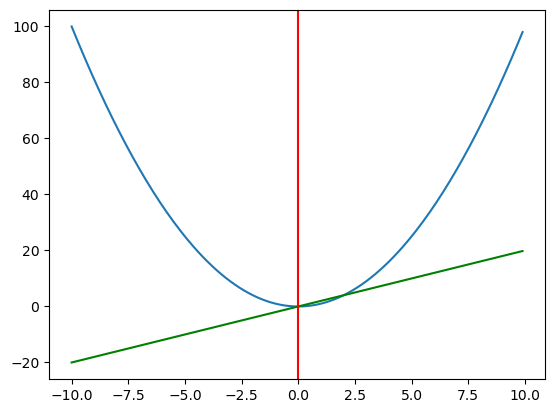

In [374]:
def df_dx(x):
    return 2 * x

# Create a list of numbers from -10 to 10, stepping by .1
xs = np.arange(-10, 10, .1)
# Square all of our x values
ys = xs ** 2

# Plot the result
plt.plot(xs, ys)
plt.plot(xs, df_dx(xs), color='g')
plt.axvline(x=0.0, color='r')
plt.show()